In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from relative_path import PATH_DATA, PATH_OUTPUT_DATA, PATH_OUTPUT_GRAPH, PATH_OUTPUT_PROF

from pandas import DataFrame, Series

import plotly.graph_objects as go
import plotly.offline as pyo

In [114]:
import missingno as msno

## Standard

In [115]:
TRACK_DATA = PATH_DATA / "tracks.parquet"
ARTISTS_DATA = PATH_DATA / "artists.parquet"

In [116]:
df_tracks = pd.read_parquet(TRACK_DATA)
df_artists = pd.read_parquet(ARTISTS_DATA)

## Analysis

In [117]:
df_tracks.release_date = pd.to_datetime(df_tracks.release_date)

In [118]:
df_tracks["year"] = df_tracks["release_date"].dt.year

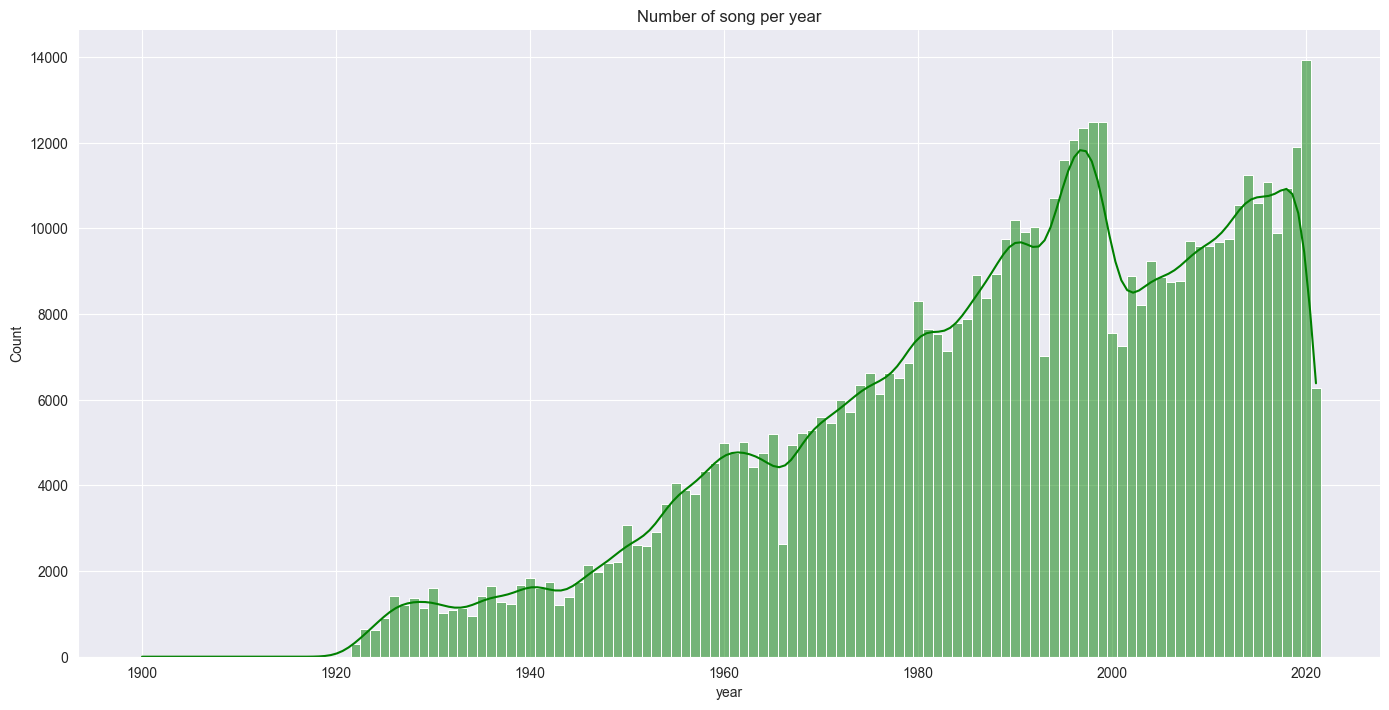

In [119]:
sns.displot(df_tracks["year"], discrete = True, aspect = 2, height = 7, kind = "hist", kde = True, color = 'green').set(title="Number of song per year")


In [120]:
most_popularity = df_tracks.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)

most_popularity.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,...,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,2021
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,2021
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,2020
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,2020
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,...,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,2020
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,...,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4,2021
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,...,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4,2020
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,...,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4,2019
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,...,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3,2020


In [121]:
lead_songs = most_popularity[['name', 'popularity']].head(20)

lead_songs

,name,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),100
93803,drivers license,99
93804,Astronaut In The Ocean,98
92810,Save Your Tears,97
92811,telepatía,97
92813,Blinding Lights,96
93805,Leave The Door Open,96
92814,The Business,95
91866,Streets,94
92816,Heartbreak Anniversary,94


<AxesSubplot: xlabel='popularity', ylabel='name'>

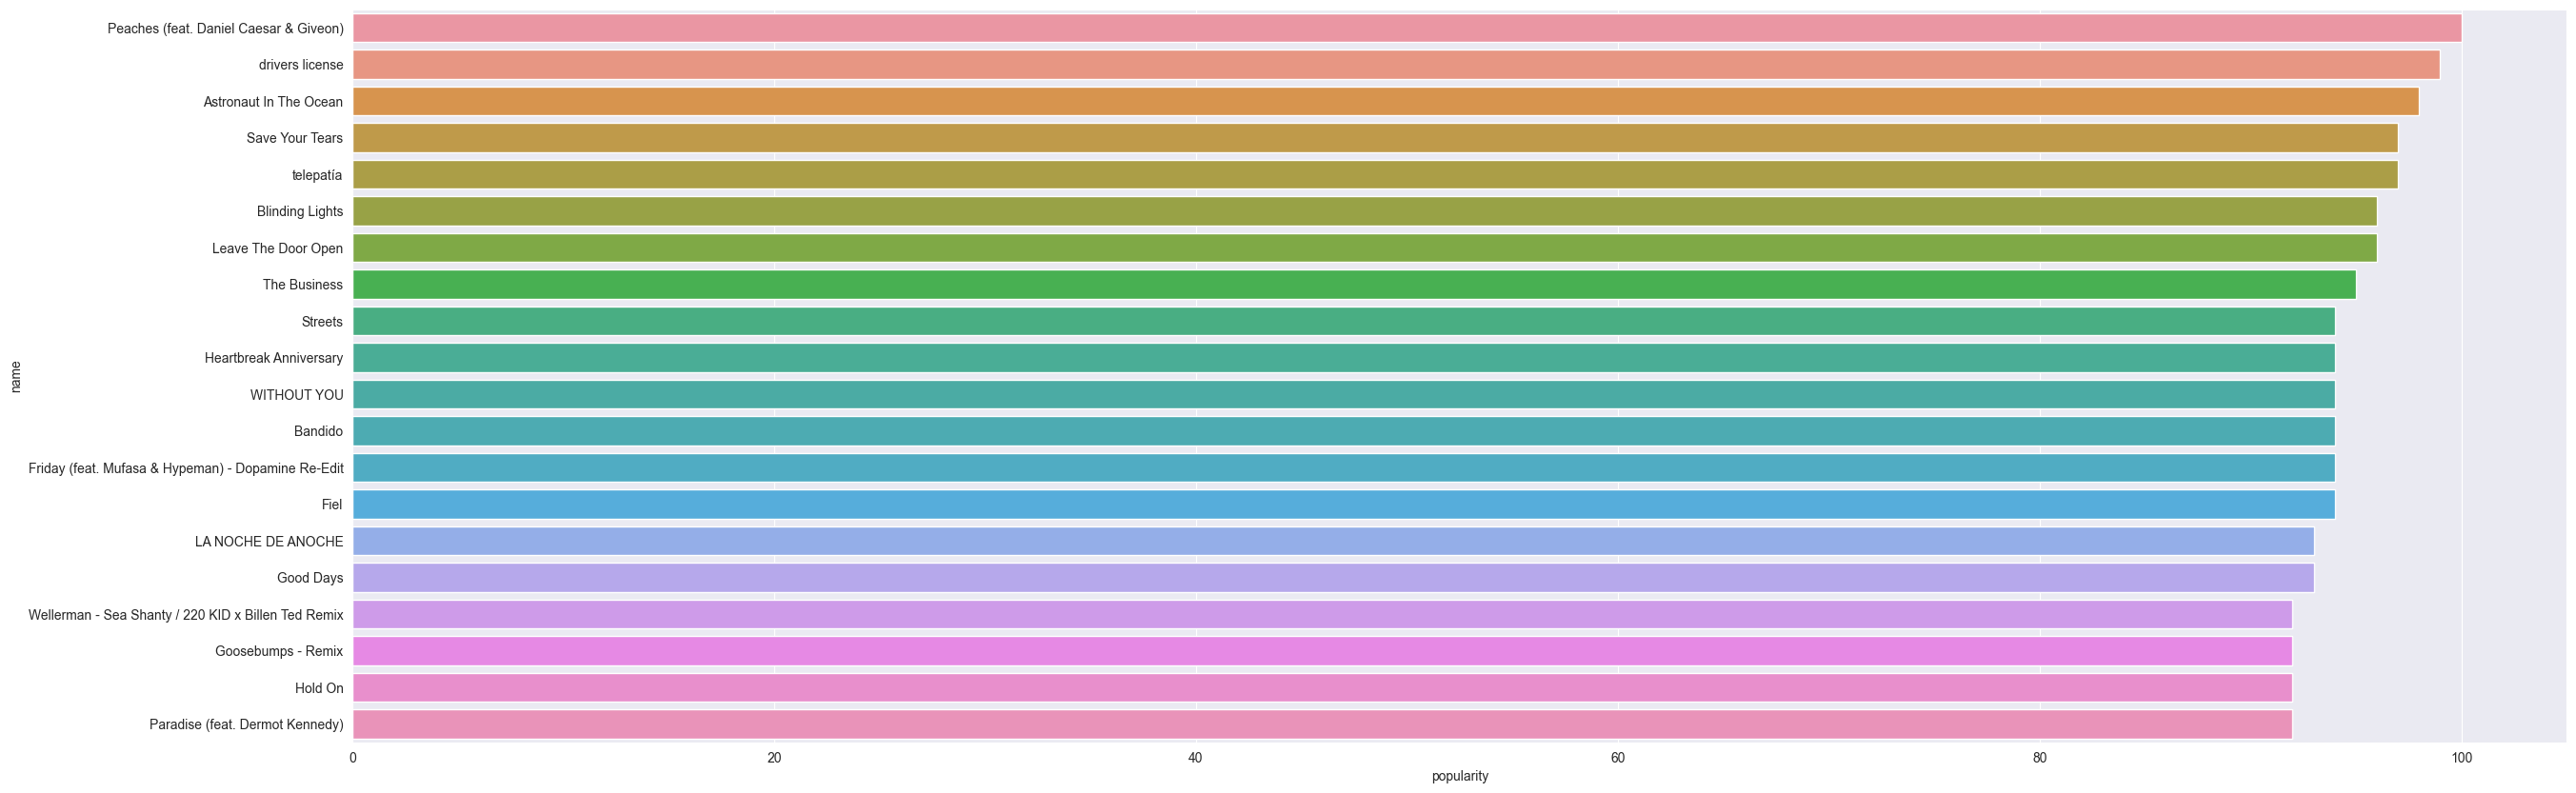

In [122]:
fig = plt.subplots(figsize = (30, 10))
sns.barplot(x = lead_songs.popularity, y = lead_songs.name)

In [123]:
from sklearn import preprocessing

feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(most_popularity[feat_cols].mean(), ignore_index=True)
mean_vals = mean_vals.append(df_tracks[feat_cols].mean(), ignore_index=True)

print(mean_vals)


fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

   danceability    energy  speechiness  acousticness  instrumentalness  \
0      0.705892  0.652081     0.099778      0.239731          0.002109   
1      0.563594  0.542036     0.104864      0.449863          0.113451   

   liveness   valence  
0  0.195157  0.527300  
1  0.213935  0.552292  


In [124]:
df_tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year'],
      dtype='object')

In [125]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
famous=df_tracks.sort_values("popularity",ascending=False).head(10)
sns.barplot(y="genre",x="popularity",data=famous).set(title="top 10 genres by popularity")

ValueError: Could not interpret input 'genre'

<Figure size 1000x500 with 0 Axes>

In [ ]:
df_features = pd.read_csv(PATH_DATA / "SpotifyFeatures.csv")

[Text(0.5, 1.0, 'top 10 genres by popularity')]

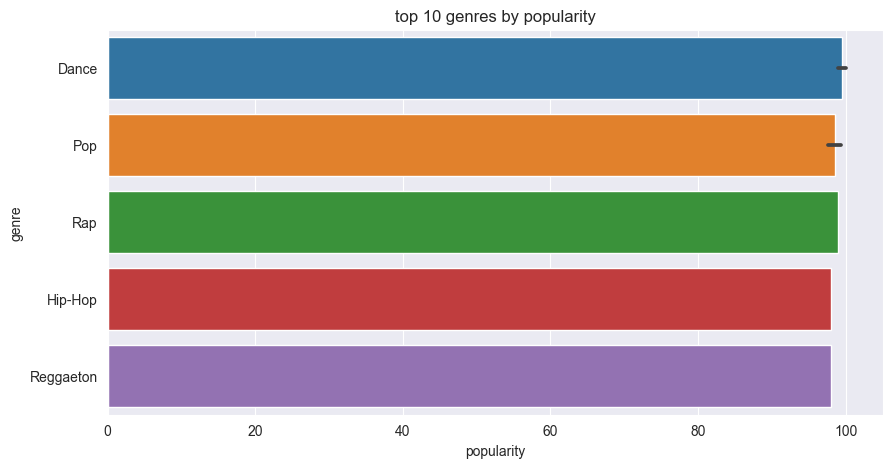

In [ ]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
famous=df_features.sort_values("popularity",ascending=False).head(10)
sns.barplot(y="genre",x="popularity",data=famous).set(title="top 10 genres by popularity")

In [ ]:
df_features[df_features["genre"] == "Dance"].sort_values("popularity", ascending=False).head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
9037,Dance,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.0691,0.719,187436,0.704,0.000000,C#,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628
9028,Dance,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,97,0.2970,0.752,201661,0.488,0.000009,F#,0.0936,-7.050,Major,0.0705,136.041,4/4,0.533
9048,Dance,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",4w8niZpiMy6qz1mntFA5uM,96,0.1530,0.841,212500,0.798,0.000003,C#,0.0618,-4.206,Minor,0.2290,95.948,4/4,0.591


In [ ]:
df_features[df_features["genre"] == "Pop"].sort_values("popularity", ascending=False).head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107829,Pop,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.0691,0.719,187436,0.704,0.000000,C#,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628


In [ ]:
df_features[df_features["genre"] == "Reggaeton"].sort_values("popularity", ascending=False).head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
138916,Reggaeton,Anuel Aa,Secreto,5W83ErFkO3aKAIS1WMi6u0,96,0.6020,0.807,258800,0.803,0.008530,B,0.1360,-4.156,Major,0.1260,91.987,4/4,0.706
138915,Reggaeton,Bad Bunny,MIA (feat. Drake),116H0KvKr2Zl4RPuVBruDO,95,0.0141,0.817,210368,0.539,0.000496,F#,0.0990,-6.349,Minor,0.0621,97.062,4/4,0.158
138917,Reggaeton,Ozuna,Baila Baila Baila,7uH27oIt4a6cIFCA8ZPcyG,95,0.0361,0.816,158400,0.754,0.000000,B,0.2170,-2.750,Minor,0.1110,99.966,4/4,0.533
138922,Reggaeton,Anuel Aa,Amanece,1LiN0Z98FkR1t0m8KmLcAH,92,0.4370,0.790,190005,0.631,0.000000,G#,0.1580,-5.549,Minor,0.0425,94.039,4/4,0.889


In [ ]:
df_features[df_features["genre"] == "Hip-Hop"].sort_values("popularity", ascending=False).head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
66607,Hip-Hop,J. Cole,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,96,0.1490,0.837,213594,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4/4,0.463
66608,Hip-Hop,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,95,0.2590,0.889,180522,0.496,0.000000,E,0.2520,-6.365,Minor,0.0905,86.003,4/4,0.544
66741,Hip-Hop,Paulo Londra,Adan y Eva,6FyRXC8tJUh863JCkyWqtk,95,0.3230,0.767,258639,0.709,0.000000,C#,0.0676,-4.470,Major,0.3360,171.993,4/4,0.720
66609,Hip-Hop,21 Savage,a lot,2t8yVaLvJ0RenpXUIAC52d,93,0.0395,0.837,288624,0.636,0.001250,C#,0.3420,-7.643,Major,0.0860,145.972,4/4,0.274


## Most Popular in the Dataset

In [126]:
df_tracks.sort_values(by="popularity", inplace=True, ascending=False)
df_tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year'],
      dtype='object')

In [127]:
sample = ["popularity", "name", "year", "artists"]

# Mixed
df_tracks[sample].head(10)

,popularity,name,year,artists
93802,100,Peaches (feat. Daniel Caesar & Giveon),2021,"['Justin Bieber', 'Daniel Caesar', 'Giveon']"
93803,99,drivers license,2021,['Olivia Rodrigo']
93804,98,Astronaut In The Ocean,2021,['Masked Wolf']
92810,97,Save Your Tears,2020,['The Weeknd']
92811,97,telepatía,2020,['Kali Uchis']
93805,96,Leave The Door Open,2021,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']"
92813,96,Blinding Lights,2020,['The Weeknd']
92814,95,The Business,2020,['Tiësto']
92816,94,Heartbreak Anniversary,2020,['Giveon']
92819,94,Bandido,2020,"['Myke Towers', 'Juhn']"


In [128]:
l = ['01', '1.0', '[0.2]']
print([i.strip('[]') for i in l])

['01', '1.0', '0.2']


In [132]:
def apply_list_len(lst):
    """ Returns the list length from the pandas series column. """
    result = lst.strip("[]").split(",")
    return len(result)

In [133]:
sample = df_tracks["artists"].str.split(",")
sample.str.len() == 1

93802     False
93803      True
93804      True
92810      True
92811      True
          ...  
23410     False
23409      True
23408     False
23407      True
444118    False
Name: artists, Length: 586672, dtype: bool

In [135]:
test = df_tracks["artists"].apply(apply_list_len)

In [138]:
test[test == 1]

93803     1
93804     1
92810     1
92811     1
92813     1
         ..
134107    1
23412     1
116385    1
23409     1
23407     1
Name: artists, Length: 478571, dtype: int64